In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('disney_plus_titles.csv')

In [13]:
#checking first five rows by calling df.head()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [14]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [15]:
df.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [16]:
df.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


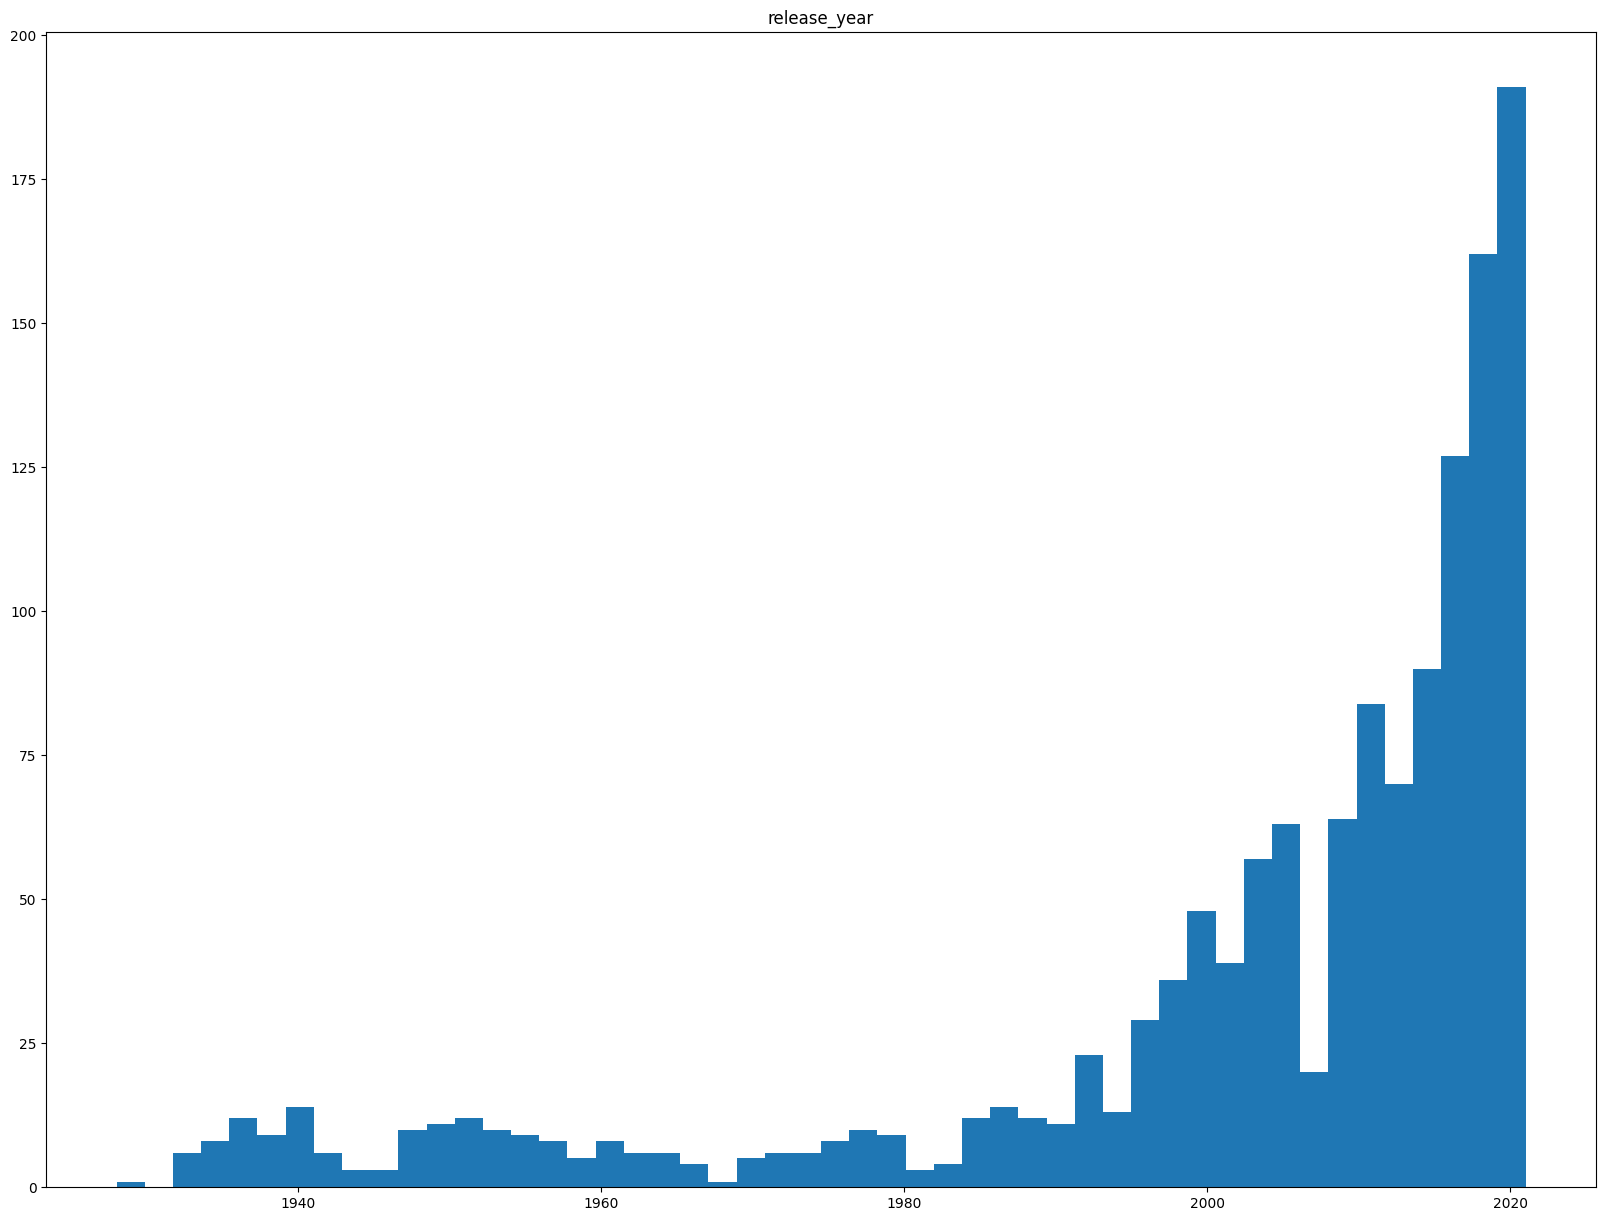

In [18]:
#pLotting histogram of all numeric values
df.hist(bins = 50, grid = False, figsize=(20,15));

In [19]:
df.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [27]:
from statsmodels.tsa. seasonal import seasonal_decompose
from statsmodels. tsa.holtwinters import ExponentialSmoothing

C:\Users\thout\AppData\Local\Temp\ipykernel_1052\1325328788.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['show_id' ].resample('M').count()


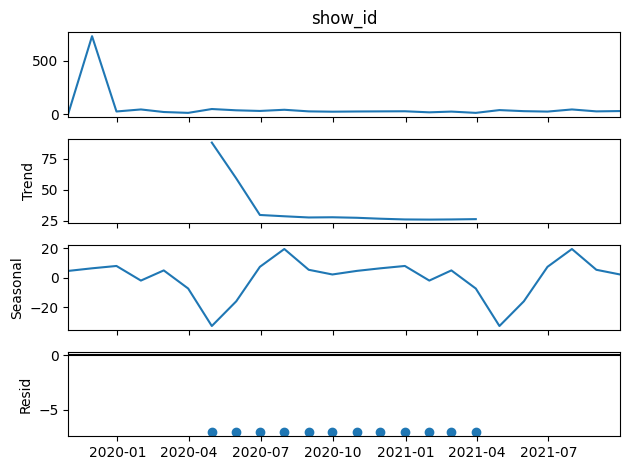

In [29]:
monthly_data = df['show_id' ].resample('M').count()
decomposition = seasonal_decompose(monthly_data, model='additive')
decomposition.plot()
plt.show()

In [32]:
model = ExponentialSmoothing(monthly_data, seasonal='add', seasonal_periods=12).fit()
forecast = model. forecast(12)

C:\Users\thout\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


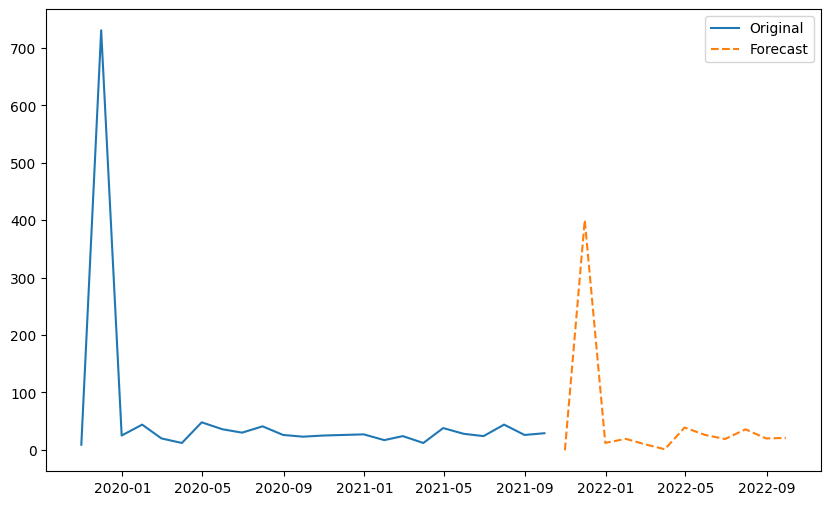

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()

In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thout\AppData\Roaming\nltk_data...


True

In [37]:
sid = SentimentIntensityAnalyzer()

In [39]:
def get_sentiment(description):
    return sid.polarity_scores(description) ['compound' ]

In [40]:
df['sentiment_score' ] = df['description' ].apply(get_sentiment)

df[['description', 'sentiment_score' ]]

,description,sentiment_score
date_added,,
2021-09-24,Two Pixar filmmakers strive to bring their uni...,0.2263
2021-09-24,The puppies go on a spooky adventure through a...,-0.2023
2021-09-24,Hazel and Gus share a love that sweeps them on...,0.7506
2021-09-22,Matt Beisner uses unique approaches to modifyi...,0.0000
2021-09-22,Spidey teams up with pals to become The Spidey...,0.0000
...,...,...
2019-10-01,Merlin trains a young orphan who's destined to...,0.0000
2019-10-01,A strong-willed family struggles to establish ...,-0.3612
NaT,Welcome to Kirby's world! It's rude and sketchy.,0.0000


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [42]:
df_data = df[df.duration.str.endswith("min")]
df_data['duration' ] = df_data['duration' ].str.replace(' min', '').astype(float)
data = df_data[['release_year', 'duration' ]].dropna()

C:\Users\thout\AppData\Local\Temp\ipykernel_1052\256951117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['duration' ] = df_data['duration' ].str.replace(' min', '').astype(float)


In [43]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster' ] = kmeans.fit_predict(data_scaled)

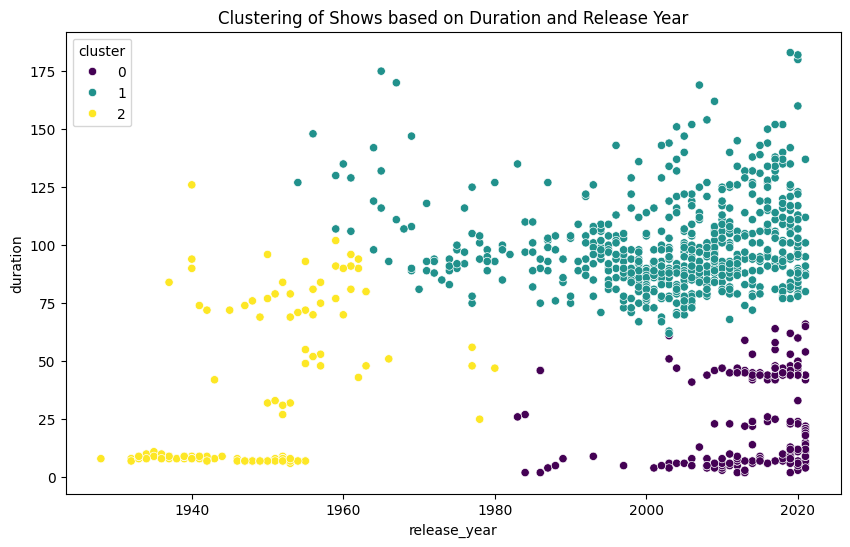

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration', hue='cluster', data=data, palette='viridis')
plt.title('Clustering of Shows based on Duration and Release Year')
plt.show()